## Data Cleaning and Analysis of User Journey Data

In [52]:
# Import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# import the data from jupyter environment
data = pd.read_csv('user_journey_raw.csv')
data

,user_id,session_id,subscription_type,user_journey
0,1516,2980231,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...
1,1516,2980248,Annual,Other-Sign up-Sign up-Sign up-Sign up-Sign up-...
2,1516,2992252,Annual,Log in-Log in-Log in-Log in-Log in-Log in
3,1516,3070491,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...
4,1516,3709807,Annual,Log in-Log in-Log in-Log in-Log in-Log in-Log ...
...,...,...,...,...
9930,509095,4487613,Annual,Other-Other-Other-Other-Other-Other-Other-Othe...
9931,509095,4842565,Annual,Other-Other-Other-Other-Other-Other-Other-Othe...
9932,509095,4843103,Annual,Other-Other
9933,509095,4845316,Annual,Other-Other-Other-Other-Other-Other-Other-Othe...


In [54]:
# check and verify the column names
data.columns

Index(['user_id', 'session_id', 'subscription_type', 'user_journey'], dtype='object')

In [55]:
# check the null values
data.isna().sum()

user_id              0
session_id           0
subscription_type    0
user_journey         0
dtype: int64

In [56]:
# check the comprehensive attributes or properties of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9935 entries, 0 to 9934
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            9935 non-null   int64 
 1   session_id         9935 non-null   int64 
 2   subscription_type  9935 non-null   object
 3   user_journey       9935 non-null   object
dtypes: int64(2), object(2)
memory usage: 310.6+ KB


In [57]:
# check the top rows of data
data.head()

,user_id,session_id,subscription_type,user_journey
0,1516,2980231,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...
1,1516,2980248,Annual,Other-Sign up-Sign up-Sign up-Sign up-Sign up-...
2,1516,2992252,Annual,Log in-Log in-Log in-Log in-Log in-Log in
3,1516,3070491,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...
4,1516,3709807,Annual,Log in-Log in-Log in-Log in-Log in-Log in-Log ...


In [58]:
# check the bottom rows of data
data.tail()

,user_id,session_id,subscription_type,user_journey
9930,509095,4487613,Annual,Other-Other-Other-Other-Other-Other-Other-Othe...
9931,509095,4842565,Annual,Other-Other-Other-Other-Other-Other-Other-Othe...
9932,509095,4843103,Annual,Other-Other
9933,509095,4845316,Annual,Other-Other-Other-Other-Other-Other-Other-Othe...
9934,509096,4845427,Annual,Other-Other-Other-Other-Other-Other-Coupon-Cou...


In [59]:
# how many entries are there
data['user_id'].count()

9935

In [60]:
# number of unique records in each columns
data.nunique()

user_id              1350
session_id           9935
subscription_type       3
user_journey         1841
dtype: int64

In [61]:
# unqie values in categorical columns
data['subscription_type'].unique()

array(['Annual', 'Monthly', 'Quarterly'], dtype=object)

In [62]:
# split the column to check the pages
data['user_journey'].str.split('-',expand=True)

,0,1,2,3,4,5,6,7,8,9,...,236,237,238,239,240,241,242,243,244,245
0,Homepage,Log in,Log in,Log in,Log in,Log in,Log in,Log in,Log in,Log in,...,None,None,None,None,None,None,None,None,None,None
1,Other,Sign up,Sign up,Sign up,Sign up,Sign up,Log in,Log in,Log in,Log in,...,None,None,None,None,None,None,None,None,None,None
2,Log in,Log in,Log in,Log in,Log in,Log in,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Homepage,Log in,Log in,Log in,Log in,Log in,Log in,Log in,Log in,Log in,...,None,None,None,None,None,None,None,None,None,None
4,Log in,Log in,Log in,Log in,Log in,Log in,Log in,Log in,Log in,Log in,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9930,Other,Other,Other,Other,Other,Other,Other,Other,Other,Other,...,None,None,None,None,None,None,None,None,None,None
9931,Other,Other,Other,Other,Other,Other,Other,Other,Other,Other,...,None,None,None,None,None,None,None,None,None,None
9932,Other,Other,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9933,Other,Other,Other,Other,Other,Other,Other,Other,Other,Other,...,None,None,None,None,None,None,None,None,None,None


In [63]:
 # Lets create a function that will clean out the same consecutive pages
def cleandata(user_journey):
        # first we should look at the data then decide how will it works here we let a variable called x and create a list by split the 
        # column called user_journey.
        x = user_journey.split('-')
        # once we have a list then we can utilize a concept of indexing so we first save the first page name in this variable called y
        y = [x[0]]
        # Then we called out a for loop in which we said that all the page after the first page would be go through a loop and if any particular
        # page is not match with the last page that submitted in y then it will append that page to y, and it will continue till last one.
        for z in x[1:]:
            if z != y[-1]:
                y.append(z)
        # Then we join the dash ( - ) in the created list called y       
        return '-'.join(y)
    

In [64]:
# we create a new column and apply the function on that user_journey column.
data['user_journey_new']= data['user_journey'].apply(cleandata)

In [65]:

data.head(30)

,user_id,session_id,subscription_type,user_journey,user_journey_new
0,1516,2980231,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...,Homepage-Log in-Other
1,1516,2980248,Annual,Other-Sign up-Sign up-Sign up-Sign up-Sign up-...,Other-Sign up-Log in
2,1516,2992252,Annual,Log in-Log in-Log in-Log in-Log in-Log in,Log in
3,1516,3070491,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...,Homepage-Log in
4,1516,3709807,Annual,Log in-Log in-Log in-Log in-Log in-Log in-Log ...,Log in
5,1516,3723132,Annual,Checkout-Checkout-Checkout-Checkout,Checkout
6,1516,3723365,Annual,Checkout-Checkout-Checkout-Checkout-Checkout-C...,Checkout
7,1516,3723382,Annual,Checkout-Checkout-Checkout-Checkout-Checkout-C...,Checkout
8,1516,3723427,Annual,Checkout-Checkout,Checkout
9,1516,3723483,Annual,Coupon-Coupon,Coupon


In [66]:
# check the output
(data['user_journey_new'].str.split('-',expand =True)).head(20)

,0,1,2,3,4,5,6,7,8,9,...,111,112,113,114,115,116,117,118,119,120
0,Homepage,Log in,Other,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Other,Sign up,Log in,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Log in,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Homepage,Log in,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Log in,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
5,Checkout,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
6,Checkout,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
7,Checkout,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
8,Checkout,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
9,Coupon,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [67]:
# let create a new dataset with these columns
newdata = data[['user_id','session_id','subscription_type','user_journey_new']]

In [68]:
newdata

,user_id,session_id,subscription_type,user_journey_new
0,1516,2980231,Annual,Homepage-Log in-Other
1,1516,2980248,Annual,Other-Sign up-Log in
2,1516,2992252,Annual,Log in
3,1516,3070491,Annual,Homepage-Log in
4,1516,3709807,Annual,Log in
...,...,...,...,...
9930,509095,4487613,Annual,Other
9931,509095,4842565,Annual,Other
9932,509095,4843103,Annual,Other
9933,509095,4845316,Annual,Other


In [69]:
newdata.drop_duplicates()

,user_id,session_id,subscription_type,user_journey_new
0,1516,2980231,Annual,Homepage-Log in-Other
1,1516,2980248,Annual,Other-Sign up-Log in
2,1516,2992252,Annual,Log in
3,1516,3070491,Annual,Homepage-Log in
4,1516,3709807,Annual,Log in
...,...,...,...,...
9930,509095,4487613,Annual,Other
9931,509095,4842565,Annual,Other
9932,509095,4843103,Annual,Other
9933,509095,4845316,Annual,Other


In [70]:
# check the total no. of each unique path 
d = newdata.groupby(['user_journey_new']).agg( user_id = ('user_id', 'nunique'))
d

,user_id
user_journey_new,
About us-Career track certificate,1
About us-Courses-Course certificate-Career track certificate-Career tracks-Courses,1
About us-Pricing-Homepage,1
About us-Resources center-Other,1
About us-Sign up,1
...,...
Upcoming courses-Other,1
Upcoming courses-Other-Upcoming courses-Career tracks-Courses,1
Upcoming courses-Pricing-Checkout,1


In [71]:
# let call the top 30 rows after doing a ranking
d1 = (d.sort_values(by = 'user_id', ascending = False)).head(30)
d1

,user_id
user_journey_new,
Checkout,760
Coupon,591
Log in,522
Other,410
Homepage-Log in,360
Homepage-Sign up,180
Sign up,108
Homepage-Pricing,87
Homepage-Courses,69


In [72]:
# now reset the index for better consideration of given columns
d11 = d1.reset_index()
d11

,user_journey_new,user_id
0,Checkout,760
1,Coupon,591
2,Log in,522
3,Other,410
4,Homepage-Log in,360
5,Homepage-Sign up,180
6,Sign up,108
7,Homepage-Pricing,87
8,Homepage-Courses,69
9,Courses-Sign up,59


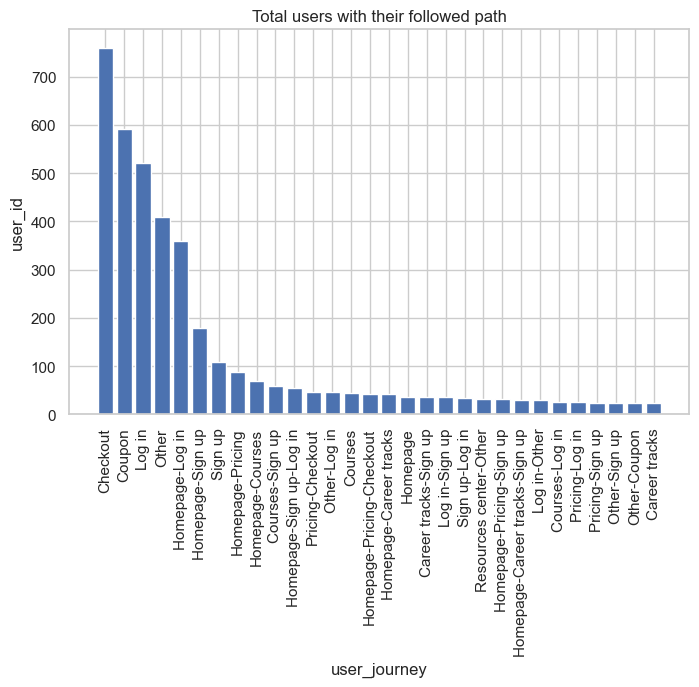

In [73]:
# lets create a bar chart using the created dataset
x = d11['user_journey_new']
y = d11['user_id']
plt.figure(figsize = (8,5))
plt.bar(x,y)
plt.xlabel('user_journey')
plt.ylabel('user_id')
plt.title('Total users with their followed path')
plt.xticks(rotation=90)
plt.show()

In [74]:
# Now we want to label each bars so we create a funtion called addlabel.
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
        
# The use of len(x) in the for loop of the addlabels function is to iterate over the indices of the input list x.
# The loop is designed to go through each element of the x list and use the corresponding index to access the elements 
# in both the x and y lists.        
# # def addlabels(x, y):
#     for i, x_value in enumerate(x):
#         plt.text(x_value=x datavalue, y[i]= y datavalue, y[i]= string)

# the addlabels function, enumerate is helpful when you want both the index (i) and 
# the value (x_value) while iterating over the elements of a list. 


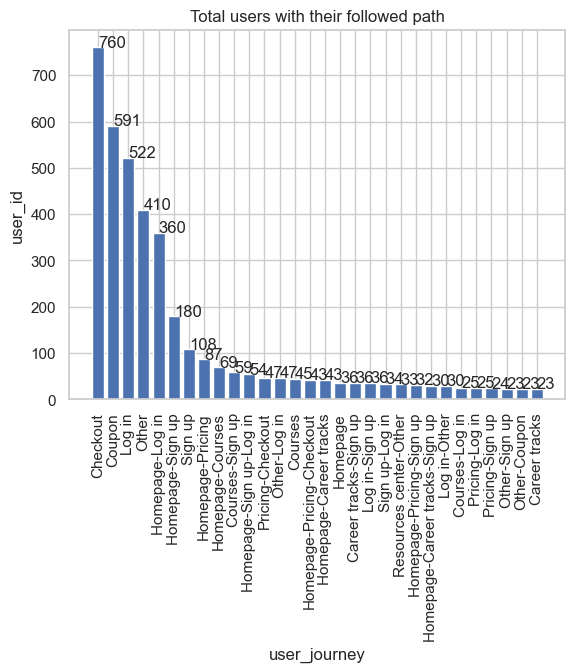

In [75]:
# call the funtion
addlabels(x, y)
plt.bar(x,y)
plt.xticks(rotation=90)
plt.xlabel('user_journey')
plt.ylabel('user_id')
plt.title('Total users with their followed path')
plt.show()

### Now we want to check how many user went to the login page from any page.

In [76]:
 #  we create a function and filter the last login page.


def lastname(userjourney):
     return userjourney.endswith('Log in')
   

In [77]:
Loginusers = newdata[newdata['user_journey_new'].apply(lastname)].groupby(['user_journey_new']).agg(Total = ('user_id','nunique')).sort_values(by='Total',ascending = False)
Loginusers

,Total
user_journey_new,
Log in,522
Homepage-Log in,360
Homepage-Sign up-Log in,54
Other-Log in,47
Sign up-Log in,34
...,...
Homepage-Course certificate-Resources center-Pricing-Log in,1
Homepage-Course certificate-Homepage-Courses-Sign up-Log in,1
Homepage-Course certificate-Homepage-Course certificate-Log in,1


In [78]:
# total no. of login users
Loginusers.sum()

Total    1360
dtype: int64

####  It means, there are 1360 users who went to login page followed by 151 different paths.

In [79]:
### we also want to check, how many user went to login page by having which type of subscription.
Loginusers1 = newdata[newdata['user_journey_new'].apply(lastname)].groupby(['user_journey_new','subscription_type']).agg(Total = ('user_id','nunique')).sort_values(by='Total',ascending = False)
Loginusers1

,,Total
user_journey_new,subscription_type,
Log in,Annual,316
Homepage-Log in,Annual,214
Log in,Monthly,183
Homepage-Log in,Monthly,134
Other-Log in,Annual,27
...,...,...
Homepage-Courses-Pricing-Resources center-Courses-Homepage-Log in,Annual,1
Homepage-Courses-Resources center-Courses-Homepage-Log in,Monthly,1
Homepage-Courses-Resources center-Log in,Annual,1


In [81]:
loginresetindex = Loginusers1.reset_index()

In [82]:
loginresetindex[loginresetindex['user_journey_new']=='Courses-Log in']

,user_journey_new,subscription_type,Total
10,Courses-Log in,Annual,14
19,Courses-Log in,Monthly,9
54,Courses-Log in,Quarterly,2


In [83]:
#### There are 14 annual users who went to Login page from Courses page.

In [84]:
### we also want to check, how many user went to login page by having which type of subscription.
Loginusers2 = newdata[newdata['user_journey_new'].apply(lastname)].groupby(['user_id','subscription_type']).agg(Total = ('user_id','nunique')).sort_values(by='Total',ascending = False)
Loginusers2

,,Total
user_id,subscription_type,
1516,Annual,1
466893,Quarterly,1
466591,Quarterly,1
466603,Annual,1
466620,Annual,1
...,...,...
371779,Annual,1
376948,Monthly,1
380790,Annual,1


In [85]:
l2 = Loginusers2.reset_index()
l2

,user_id,subscription_type,Total
0,1516,Annual,1
1,466893,Quarterly,1
2,466591,Quarterly,1
3,466603,Annual,1
4,466620,Annual,1
...,...,...,...
731,371779,Annual,1
732,376948,Monthly,1
733,380790,Annual,1
734,381670,Annual,1


In [86]:
ll2 = l2.groupby(['subscription_type']).agg(total_login_users = ('Total','sum'))
ll2

,total_login_users
subscription_type,
Annual,450
Monthly,254
Quarterly,32


#### So there are 450 login-users who have annual subscription, 254 users who have monthly, and 32 who have quarterly. 

In [87]:
n1 = (data.groupby(['subscription_type']).agg(total = ('user_id','nunique'))).reset_index()
n1

,subscription_type,total
0,Annual,931
1,Monthly,376
2,Quarterly,43


In [88]:
# let merge the two dataset to visualize for better understanding

m1 = pd.merge(ll2,n1, on ='subscription_type')
m1

,subscription_type,total_login_users,total
0,Annual,450,931
1,Monthly,254,376
2,Quarterly,32,43


#### It means that almost half of the annual users went to the login page, 67% users are monthly based, and 74% are quarterly users.

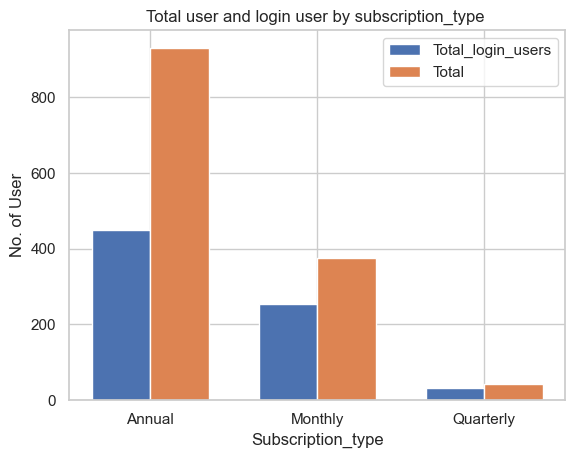

In [89]:
#lets create bar chart
x1 =  m1['subscription_type']
y1 = m1['total_login_users']
y2 = m1['total']      


bar_width = 0.35

# Calculate the position for each bar
r1 = range(len(x1))
r2 = [x + bar_width for x in r1]

# Create the bar chart
plt.bar(r1, y1, width=bar_width, label='Total_login_users')
plt.bar(r2, y2, width=bar_width, label='Total')
plt.xticks([x + bar_width/2 for x in range(len(x1))], x1)  # plt.xticks(ticks(position of label)=None, labels=None, **kwargs)
plt.legend()
plt.xlabel('Subscription_type')
plt.ylabel('No. of User')
plt.title('Total user and login user by subscription_type ')
plt.show()

<Axes: xlabel='subscription_type', ylabel='total'>

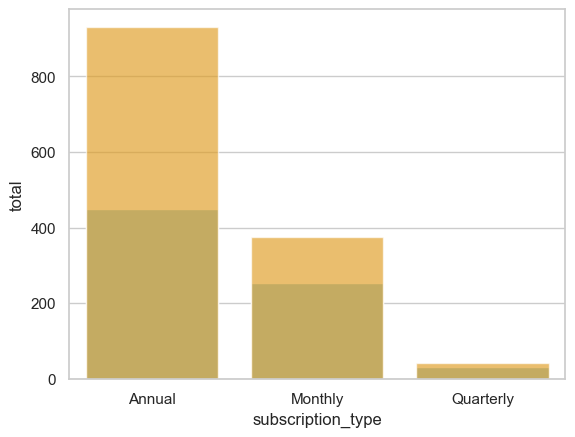

In [90]:
sns.set(style="whitegrid")

# Create a side-by-side bar plot using Seaborn
sns.barplot(x=m1['subscription_type'], y=m1['total_login_users'], data=m1, color='skyblue', label='Total Login Users')
sns.barplot(x=m1['subscription_type'], y=m1['total'], data=m1, color='orange', label='Total', alpha=0.65)

In [91]:
loginuserdf = pd.DataFrame(Loginusers1.unstack(level =1))
loginuserdf.head(20)

Total                  
subscription_type                                  Annual Monthly Quarterly
user_journey_new                                                           
Blog-Log in                                           1.0     NaN       NaN
Career track certificate-Career tracks-Log in         NaN     1.0       NaN
Career track certificate-Career tracks-Sign up-...    1.0     NaN       NaN
Career track certificate-Log in                       1.0     NaN       NaN
Career track certificate-Sign up-Career track c...    1.0     NaN       NaN
Career tracks-Courses-Career track certificate-...    1.0     NaN       NaN
Career tracks-Courses-Sign up-Log in                  NaN     1.0       1.0
Career tracks-Log in                                  7.0     2.0       1.0
Career tracks-Pricing-Log in                          1.0     NaN       NaN
Career tracks-Resources center-Upcoming courses...    NaN     1.0       NaN
Career tracks-Sign up-Career tracks-Log in            1.0     NaN       NaN
Career tracks-Sign up-Log in                          8.0     2.0       NaN
Checkout-Homepage-Career tracks-Courses-Log in        NaN     1.0       NaN
Checkout-Homepage-Log in                              1.0     1.0       NaN
Coupon-Homepage-Log in                                2.0     NaN       NaN
Coupon-Homepage-Sign up-Log in                        1.0     NaN       NaN
Course certificate-Log in                             1.0     NaN       NaN
Course certificate-Sign up-Log in                     NaN     1.0       NaN
Courses-Career track certificate-Career tracks-...    1.0     NaN       NaN
Courses-Career track certificate-Course certifi...    NaN     1.0       NaN

### Now we want to check how many user went to the Sign up page from any page.

In [92]:
 def lastpage(userjourney):
     return userjourney.endswith('Sign up')
   

In [93]:
Signupusers = newdata[newdata['user_journey_new'].apply(lastpage)].groupby(['user_id','user_journey_new','subscription_type']).agg(Total = ('user_id','nunique')).sort_values(by='Total',ascending = False)
Signupusers

Total
user_id user_journey_new                                   subscription_type       
14415   Pricing-Sign up-Pricing-Sign up                    Monthly                1
470403  Courses-Career tracks-Courses-Pricing-Sign up      Monthly                1
469931  Sign up                                            Monthly                1
469961  Courses-Career tracks-Courses-Sign up              Annual                 1
        Homepage-Sign up                                   Annual                 1
...                                                                             ...
462474  Other-Course certificate-Pricing-Career track c... Monthly                1
462541  Homepage-Sign up                                   Annual                 1
462667  Homepage-Sign up                                   Annual                 1
462670  Homepage-Sign up-Homepage-Pricing-Sign up          Quarterly              1
509017  Other-Career tracks-Courses-Career tracks-Sign up  Annual                 1

[817 rows x 1 columns]

In [94]:
s1 = Signupusers.reset_index()
s1.groupby(['user_id','subscription_type'])['Total'].sum().sort_values(ascending = False)

user_id  subscription_type
468397   Annual               6
347748   Annual               5
500355   Annual               4
468114   Annual               4
150418   Annual               4
                             ..
464290   Annual               1
464079   Monthly              1
463972   Monthly              1
463897   Monthly              1
509017   Annual               1
Name: Total, Length: 639, dtype: int64

#### so it means that user id 468397 have reached 6 times to the signup page before taking the annual subscription.

In [95]:
s2 = s1.groupby(['subscription_type'])['Total'].sum().sort_values(ascending = False)
s2

subscription_type
Annual       457
Monthly      318
Quarterly     42
Name: Total, dtype: int64

In [96]:
newdata['user_id'].nunique()

1350

In [97]:
newdata.groupby(['user_id','subscription_type']).agg(Total = ('user_id','count')).sort_values(by ='Total',ascending =False)

,,Total
user_id,subscription_type,
466603,Annual,135
419662,Annual,106
279886,Annual,87
454643,Monthly,70
347748,Annual,56
...,...,...
468978,Annual,1
469021,Annual,1
469024,Annual,1


#### It means that the maximum no. of sessions used by a user id which id is 466603 and he/she obtained annual subscribtion.

In [98]:
### how many users got annual, monthly and quarterly type of subcription are
newdata.groupby(['subscription_type']).agg(Total = ('user_id','nunique'))

,Total
subscription_type,
Annual,931
Monthly,376
Quarterly,43


#### It means that there are highest no. of user who subscribed the annual package then monthly and lastly quarterly.

In [99]:
### How many user got each type of subcription with which most occuring user jouney
sj= newdata.groupby(['subscription_type','user_journey_new']).agg(Total = ('user_id','nunique')).sort_values(by = 'Total',ascending = False)
sj

Total
subscription_type user_journey_new                                         
Annual            Coupon                                                543
                  Checkout                                              401
Monthly           Checkout                                              322
Annual            Log in                                                316
                  Other                                                 291
...                                                                     ...
                  Homepage-Pricing-Courses-Resources center-Caree...      1
                  Homepage-Pricing-Homepage-Career track certific...      1
                  Homepage-Pricing-Homepage-Career tracks-Courses...      1
                  Homepage-Pricing-Homepage-Career tracks-Sign up         1
Quarterly         Upcoming courses-Resources center-Other-Sign up         1

[1146 rows x 1 columns]

In [100]:
fj =newdata.groupby(['user_id','subscription_type']).agg(First_Journey =('user_journey_new','first'),Last_Journey =('user_journey_new','last'))
fj.head(15)

,,First_Journey,Last_Journey
user_id,subscription_type,,
1516,Annual,Homepage-Log in-Other,Checkout
3395,Annual,Other,Checkout
10107,Annual,Homepage,Checkout
11145,Monthly,Homepage-Log in,Checkout
12400,Monthly,Homepage-Career tracks-Sign up-Log in,Checkout
13082,Monthly,Checkout,Checkout
14415,Monthly,Pricing-Sign up-Pricing-Sign up,Checkout
15630,Annual,Log in,Checkout
16589,Quarterly,Homepage-Career tracks-Homepage-Career tracks-...,Checkout


In [101]:
fjj =fj.reset_index()
fjj

,user_id,subscription_type,First_Journey,Last_Journey
0,1516,Annual,Homepage-Log in-Other,Checkout
1,3395,Annual,Other,Checkout
2,10107,Annual,Homepage,Checkout
3,11145,Monthly,Homepage-Log in,Checkout
4,12400,Monthly,Homepage-Career tracks-Sign up-Log in,Checkout
...,...,...,...,...
1345,509060,Annual,Other,Other
1346,509061,Annual,Coupon,Coupon
1347,509085,Annual,Coupon,Coupon
1348,509095,Annual,Other,Other


In [102]:
(fjj[fjj['Last_Journey']=='Checkout']).nunique()

user_id              681
subscription_type      3
First_Journey        238
Last_Journey           1
dtype: int64

#### There are 681 users whose last journey is checkout

In [103]:
### how many users took the subcription just because of coupen.
def coupen(column):
      return column.endswith('Coupon')

In [104]:
cs = newdata[newdata['user_journey_new'].apply(coupen)]
cs

,user_id,session_id,subscription_type,user_journey_new
9,1516,3723483,Annual,Coupon
76,15630,4691158,Annual,Coupon
91,19458,4840878,Annual,Coupon
95,22679,3647017,Annual,Coupon
96,22679,3648373,Annual,Coupon
...,...,...,...,...
9923,509036,4841754,Annual,Other-Coupon
9925,509057,4843116,Annual,Other-Coupon
9928,509061,4843354,Annual,Coupon
9929,509085,4844928,Annual,Coupon


In [105]:
cs.groupby(['user_id','user_journey_new'])['user_id'].count().sort_values(ascending =False)

user_id  user_journey_new
286605   Coupon              20
454551   Coupon              14
203365   Coupon              11
172645   Coupon              11
499673   Coupon              11
                             ..
465355   Coupon               1
465337   Coupon               1
465169   Coupon               1
465102   Coupon               1
509096   Other-Coupon         1
Name: user_id, Length: 617, dtype: int64

#### This user 286605 went 20 times to the coupon page.

In [106]:
### how many users took the subcription through Checkout.
def checkout(column):
      return column.endswith('Checkout')

In [107]:
chs = newdata[newdata['user_journey_new'].apply(checkout)]
chs

,user_id,session_id,subscription_type,user_journey_new
5,1516,3723132,Annual,Checkout
6,1516,3723365,Annual,Checkout
7,1516,3723382,Annual,Checkout
8,1516,3723427,Annual,Checkout
10,1516,3723508,Annual,Checkout
...,...,...,...,...
9872,508928,4775783,Annual,Pricing-Checkout
9889,508977,4838298,Annual,Checkout
9890,508977,4838561,Annual,Checkout
9892,508977,4839429,Annual,Checkout


In [108]:
chs.groupby(['user_id','user_journey_new'])['user_id'].count().sort_values(ascending =False)

user_id  user_journey_new         
454643   Checkout                     21
478040   Checkout                     20
476110   Checkout                     20
230961   Checkout                     19
496848   Checkout                     18
                                      ..
462890   Homepage-Pricing-Checkout     1
463014   Checkout                      1
463110   Checkout                      1
463183   Checkout                      1
509017   Checkout                      1
Name: user_id, Length: 912, dtype: int64

#### This user 454643 went 21 times to the checkout page.

In [109]:
### how many users took the subcription after he/she started with coupon page and lasted at checkout page.
def couponcheck(column):
      return column.startswith('Coupon') & column.endswith('Checkout')

In [110]:
cc = newdata[newdata['user_journey_new'].apply(couponcheck)]
cc

,user_id,session_id,subscription_type,user_journey_new
3741,409856,4121399,Monthly,Coupon-Homepage-Pricing-Checkout


#### There is only one user who went  to checkout page from coupon page.

In [111]:
### how many users took the subcription after he/she started with coupon page and lasted at Sign up page.
def couponsigup(column):
      return column.startswith('Coupon') & column.endswith('Sign up')

In [112]:
cs = newdata[newdata['user_journey_new'].apply(couponsigup)]
cs

,user_id,session_id,subscription_type,user_journey_new
1365,289171,4698762,Annual,Coupon-Homepage-Sign up
6425,466828,3633391,Annual,Coupon-Homepage-Sign up


#### There are only two users who started their journey with the coupon page and went to signup page.